<a href="https://colab.research.google.com/github/KaterynaSiniuta/ML-Hillel/blob/main/HW_6_Metric_model_(classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**ДЗ 6. Metric model (classification)**

Для датасету https://archive.ics.uci.edu/ml/datasets/Abalone побудувати модель класифікації

Таргет - вік (кількість кілець)

Додатково: таргет - стать (infant, male, female)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# We will use the Seaborn library
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [ ]:
datasets_path = "/content/drive/MyDrive/Colab Notebooks/abalone/"
abalone = pd.read_csv(datasets_path + "abalone.data")

abalone.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


Додамо назви колонок

In [ ]:
abalone.columns =["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [ ]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Nan нема, флоати та пол - категоріальна фіча, кільця - ціле число, потрібно розглядати для завдання як категоріальну

In [ ]:
# який діапазон значень у rings?

print(abalone['Rings'].min(), abalone['Rings'].max())

1 29


In [ ]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [ ]:
# Перевірка на нульові значення у кожному стовпці
print(abalone.isin([0]).sum())


Sex               0
Length            0
Diameter          0
Height            2
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


некоректний запис, бо не буває мушлі з висотою 0. так як записів достатньо - видалемо

In [ ]:
# Remove rows where 'Height' is 0
abalone = abalone[abalone['Height'] != 0]

# Verify the change
print(abalone.isin([0]).sum())


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


Розміри дуже сильно корелюють між собою, червонісенький хітмапчик :( поки так і залишу

<Axes: ylabel='Rings'>

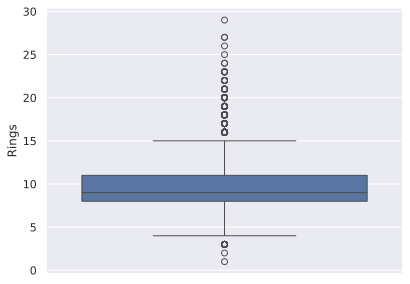

In [ ]:
# скільки у нас статистичних викидів по таргету
sns.boxplot(abalone["Rings"])

основний діапазон 3-15 років

In [ ]:
# Example using IQR method to define outliers:

Q1 = abalone['Rings'].quantile(0.25)
Q3 = abalone['Rings'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = abalone[(abalone['Rings'] < lower_bound) | (abalone['Rings'] > upper_bound)]
num_outliers = len(outliers)

print(f"Number of outliers in 'Rings' column (using IQR method): {num_outliers}")


#Alternative approach: using the Z-score method

from scipy import stats

z = np.abs(stats.zscore(abalone['Rings']))
threshold = 3
outliers_z = np.where(z > threshold)
num_outliers_z = len(outliers_z[0])


print(f"Number of outliers in 'Rings' column (using Z-score method): {num_outliers_z}")


Number of outliers in 'Rings' column (using IQR method): 278
Number of outliers in 'Rings' column (using Z-score method): 62


залишимо так як 278 це багато, хоч і відсоток для датасету не великий

In [ ]:
!pip install category_encoders
from category_encoders import TargetEncoder

# Assuming 'abalone' DataFrame is already loaded and processed as in the previous code

# Create a TargetEncoder object
encoder = TargetEncoder(cols=['Sex'])

# Fit the encoder on the training data
encoder.fit(abalone['Sex'], abalone['Rings'])

# Transform the 'Sex' column
abalone['Sex_encoded'] = encoder.transform(abalone['Sex'])

# Display the first few rows to see the encoded 'Sex' column
print(abalone[['Sex', 'Sex_encoded']].head())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.7 MB/s eta 0:00:00
  Sex  Sex_encoded
0   M    10.702685
1   F    11.129304
2   M    10.702685
3   I     7.891791
4   I     7.891791


In [ ]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_encoded
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,10.702685
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,11.129304
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,10.702685
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,7.891791
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,7.891791


In [ ]:
# приберемо стопчик sex

# Assuming 'abalone' DataFrame is already loaded and processed as in the previous code

# Drop the original 'Sex' column
abalone = abalone.drop('Sex', axis=1)

# Display the first few rows to verify the removal
print(abalone.head())


   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.350     0.265   0.090        0.2255          0.0995          0.0485   
1   0.530     0.420   0.135        0.6770          0.2565          0.1415   
2   0.440     0.365   0.125        0.5160          0.2155          0.1140   
3   0.330     0.255   0.080        0.2050          0.0895          0.0395   
4   0.425     0.300   0.095        0.3515          0.1410          0.0775   

   Shell weight  Rings  Sex_encoded  
0         0.070      7    10.702685  
1         0.210      9    11.129304  
2         0.155     10    10.702685  
3         0.055      7     7.891791  
4         0.120      8     7.891791  


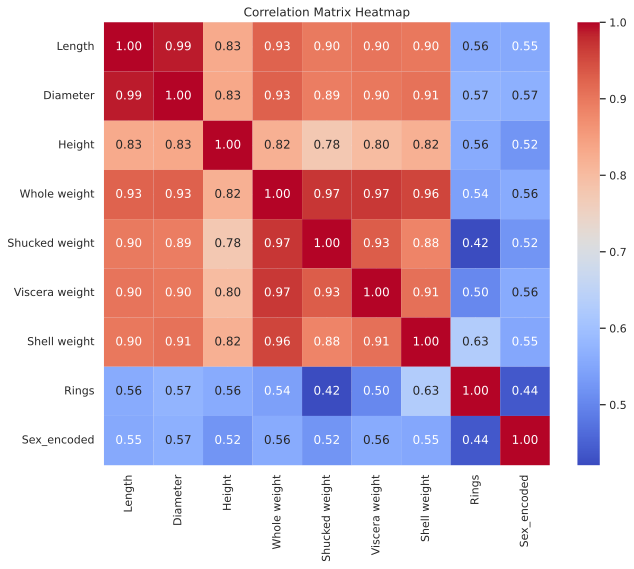

In [ ]:
correlation_matrix = abalone.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


так як розміри та вага дуже сильно повязані один з одним дуже велика кількість кореляцій, що більще 0.8

In [ ]:
# Розбиваємо датасет на X та Y
X = abalone.drop(columns="Rings")  # фічі
Y = abalone["Rings"]  # таргет

In [ ]:
# Зробимо масштабування фіч використовуючи MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
#Ділемо датасет на тренувальну, валідаційну та тестові частини за схемою 60-20-20
from sklearn.model_selection import train_test_split

x_train, x_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.6)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size=0.5)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Ініціалізуємо класифікатор RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Визначаємо параметри для GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Кількість дерев
    'max_depth': [None, 10, 20],  # Максимальна глибина дерева
    'min_samples_split': [2, 5, 10], # Мінімальна кількість зразків для розділення вузла
    'min_samples_leaf': [1, 2, 4] # Мінімальна кількість зразків у листі
}

# Створюємо об'єкт GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Виконуємо підбір гіперпараметрів на навчальних даних
grid_search.fit(x_train, y_train)

# Виводимо найкращі параметри та оцінку
print("Найкращі параметри:", grid_search.best_params_)
print("Найкраща оцінка:", grid_search.best_score_)

# Оцінюємо модель з найкращими параметрами на валідаційних даних
best_rf_classifier = grid_search.best_estimator_
accuracy = best_rf_classifier.score(x_valid, y_valid)
print(f"Точність на валідаційних даних: {accuracy}")


Найкращі параметри: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Найкраща оцінка: 0.2691720558882235
Точність на валідаційних даних: 0.25988023952095807


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

# Initialize and train other classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    r2 = r2_score(y_valid, y_pred)  # Calculate R-squared
    print(f"{name} R-squared: {r2}")

Logistic Regression R-squared: 0.22070654800736156
SVM R-squared: 0.19483892778330691
KNN R-squared: 0.245318458511802
Decision Tree R-squared: 0.16344618479294926


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# Initialize the linear regression model
linear_model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],  #
    'positive': [True, False]
}


# Create GridSearchCV object
grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')


# Fit the model with hyperparameter tuning
grid_search.fit(x_train, y_train)


# Get the best model and its hyperparameters
best_linear_model = grid_search.best_estimator_
best_params = grid_search.best_params_


# Evaluate the model on the validation set
y_pred_valid = best_linear_model.predict(x_valid)
mse_valid = mean_squared_error(y_valid, y_pred_valid)
r2_valid = r2_score(y_valid, y_pred_valid)


print("Best Hyperparameters:", best_params)
print(f"Validation MSE: {mse_valid}")
print(f"Validation R-squared: {r2_valid}")


# Evaluate on the test set (for a final unbiased performance evaluation)
y_pred_test = best_linear_model.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test MSE: {mse_test}")
print(f"Test R-squared: {r2_test}")


Best Hyperparameters: {'fit_intercept': True, 'positive': False}
Validation MSE: 4.956808321507077
Validation R-squared: 0.4802699156369439
Test MSE: 4.873047501786926
Test R-squared: 0.5629433077852617


лінійна регресія показує кращу точність за класифікаційні моделі

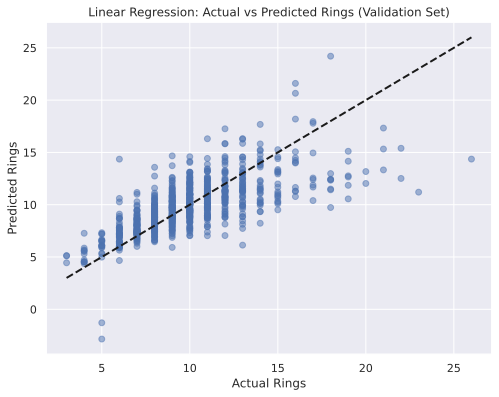

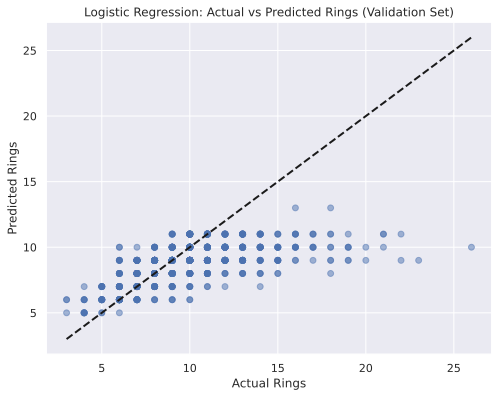

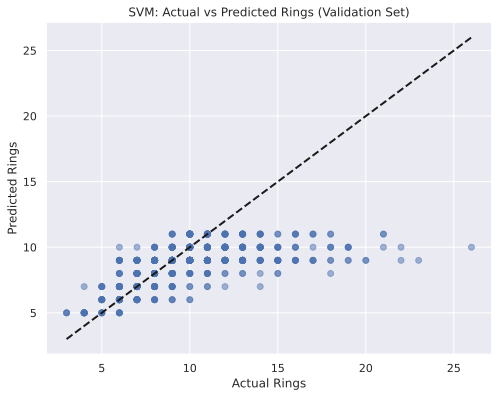

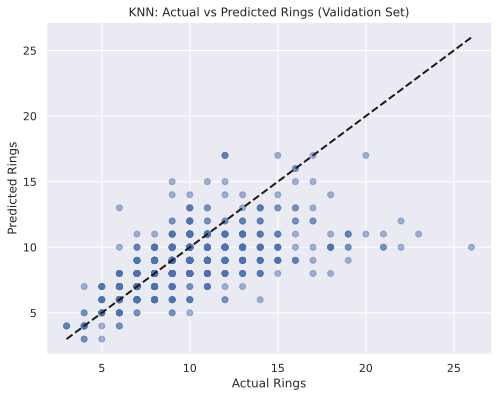

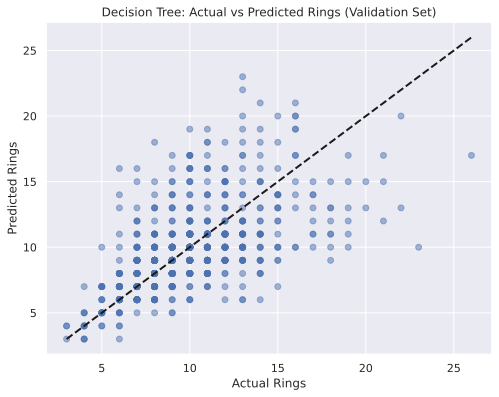

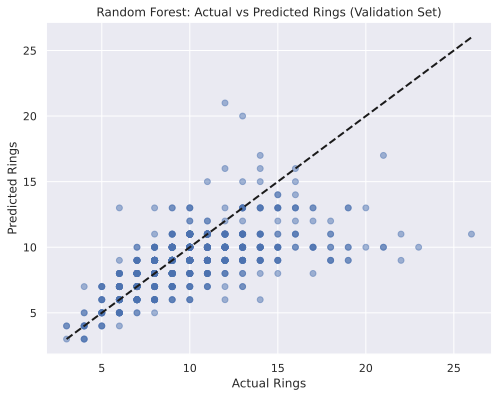

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_valid, y_pred_valid, alpha=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2) # Line of perfect prediction
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Linear Regression: Actual vs Predicted Rings (Validation Set)')
plt.show()


for name, clf in classifiers.items():
    y_pred = clf.predict(x_valid)  # Assuming x_valid is defined
    plt.figure(figsize=(8, 6))
    plt.scatter(y_valid, y_pred, alpha=0.5)
    plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2) # Line of perfect prediction
    plt.xlabel('Actual Rings')
    plt.ylabel('Predicted Rings')
    plt.title(f'{name}: Actual vs Predicted Rings (Validation Set)')
    plt.show()

#Plot for RandomForestClassifier
y_pred_rf = best_rf_classifier.predict(x_valid)
plt.figure(figsize=(8, 6))
plt.scatter(y_valid, y_pred_rf, alpha=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title(f'Random Forest: Actual vs Predicted Rings (Validation Set)')
plt.show()


Найкраще повела себе Random Forest R-squared з класифікацій, але лінійна регресія дає кращі показники